# trading policy

## importing libraries and mounting drive

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
from sklearn.cluster import KMeans
import seaborn as sns
from tqdm import tqdm
sns.set_theme()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## loading data

In [ ]:
path = '/content/drive/MyDrive/Data/Node Embeddings'
embed = []
for i in range(1,15):
  em = torch.load(f'{path}/node_embedding{i}.pt',map_location=torch.device('cpu'))
  em = torch.detach(torch.Tensor.cpu(em)).numpy()
  embed.append(em)
  print(em.shape)
names = np.load('/content/drive/MyDrive/Data/ProcessedData/World/Names/5400_names.npy')
print(names.shape)
time_series = pd.read_csv('/content/drive/MyDrive/Data/ProcessedData/World/TimeSeries_long.csv',index_col=0).interpolate()
# My_Dataset2.columns = [f'stock {i+1}' for i in range(My_Dataset2.shape[1])]

(5418, 64)
(5418, 64)
(5418, 64)
(5418, 64)
(5418, 64)
(5418, 64)
(5418, 64)
(5418, 64)
(5418, 64)
(5418, 64)
(5418, 64)
(5418, 64)
(5418, 64)
(3294, 64)
(5418,)


(array([2.99000e+02, 3.22100e+03, 1.02100e+04, 3.33590e+04, 1.26343e+05,
        3.18220e+04, 3.91400e+03, 1.50100e+03, 1.46000e+02, 1.00000e+00]),
 array([-46.91113663, -36.58701324, -26.26289368, -15.93877125,
         -5.6146493 ,   4.70947266,  15.03359413,  25.35771561,
         35.68183899,  46.00595856,  56.33008194]),
 <BarContainer object of 10 artists>)

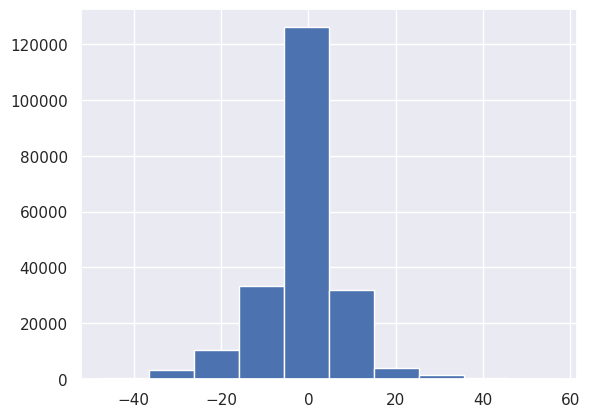

In [ ]:
plt.hist(embed[13].reshape(-1))

In [ ]:
random = np.zeros((names.shape[0],64))
for stock in range(names.shape[0]):
  random[stock,:] = np.random.randn(64,)/5

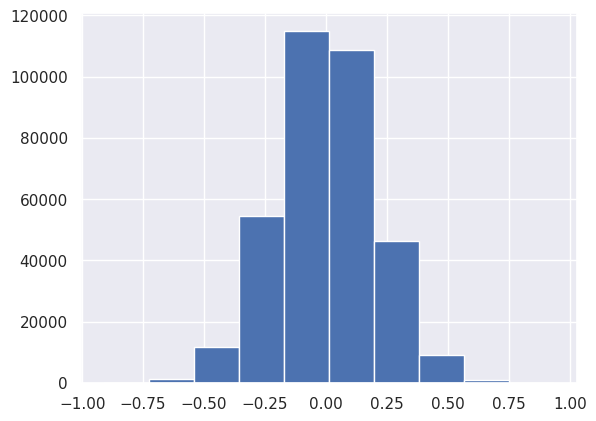

In [ ]:
plt.hist(random.reshape(-1));

## clustring

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram,cut_tree
import sys
from sklearn.cluster import MiniBatchKMeans
!pip install minisom
from minisom import MiniSom
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.mixture import GaussianMixture
from sklearn.cluster import Birch
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import SpectralClustering
from sklearn.cluster import MeanShift
from sklearn.cluster import KMeans
from sklearn.cluster import OPTICS
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import MeanShift


  Preparing metadata (setup.py) ... done
  Created wheel for minisom: filename=MiniSom-2.3.1-py3-none-any.whl size=10588 sha256=cab9ec4bc428dd7a1b3eeeacb6b9db9349326d321a4f3de895533991e50bf0ad
  Stored in directory: /root/.cache/pip/wheels/c7/92/d2/33bbda5f86fd8830510b16aa98c8dd420129b5cb24248fd6db
Successfully built minisom


In [ ]:
def hierarcial(features,n):
  #  hierarchical clustering
  Z = linkage(features, method='complete')
  # plt.figure(figsize=(25,13))
  # Generate dendrogram
  # dendrogram(Z,labels=EN_labels)
  # Display the plot
  # plt.show();
  labels = cut_tree(Z, n_clusters=n)
  return labels.reshape(-1)
def Agglomerative(features,n):
  # Perform agglomerative clustering
  clustering = AgglomerativeClustering(n_clusters=n, affinity='precomputed', linkage='complete')
  labels = clustering.fit_predict(features)
  return labels
def optics_(features,n):
  optics = OPTICS(min_samples=0.001,p=2)
  optics.fit(features)
  labels = optics.labels_
  labels = labels+1
  return labels
def kmeans(features,n):
    kmeans = KMeans(n_clusters=n,)
    kmeans.fit(features)
    # Get the cluster labels for each node
    return kmeans.labels_
def meanshift(features,n):
    # Perform Mean Shift clustering
    meanshift = MeanShift(max_iter=300)
    clusters = meanshift.fit_predict(features)
    return clusters
def spec(features,n):
    spectral_clustering = SpectralClustering(n_clusters=n, affinity='precomputed')
    clusters = spectral_clustering.fit_predict(features)
    return clusters
def Affinity_Propagation(features,damp=0.6):
    # Perform clustering using Affinity Propagation
    aff_prop = AffinityPropagation(damping=damp,affinity='precomputed')
    clusters = aff_prop.fit_predict(features)
    # Get the cluster centers
    cluster_centers = aff_prop.cluster_centers_indices_
    return cluster_centers
def Birch_clustering(features,n):
    birch = Birch(n_clusters=n)  # Set n_clusters to None for automatic determination of the number of clusters
    # Fit the adjacency matrix to the Birch clustering model
    clusters = birch.fit_predict(features)
    return clusters
def GM(features,n):
    gmm = GaussianMixture(n_components=7)  # Set the number of components (clusters) to 3
    # Reshape the adjacency matrix to fit the GMM input requirements
    X = features#.reshape(-1, 1)
    # Fit the adjacency matrix to the GMM clustering model
    gmm.fit(X)
    # Predict the cluster labels for each node
    clusters = gmm.predict(X)
    clusters = clusters[0:50]
    return clusters
def ward_clustering(features,n):
    # Perform hierarchical clustering using Ward's Method
    Z = linkage(features, method='ward')
    return cut_tree(Z, n_clusters=n).reshape(-1)
def SOM_clusterin(features,n):
    # Define SOM parameters
    map_size = (5, 5)  # Adjust the map size according to your preference
    input_len = features.shape[1]  # Number of features for each node
    sigma = 1  # Initial neighborhood radius
    learning_rate = 0.2  # Initial learning rate
    # Initialize and train the SOM
    som = MiniSom(map_size[0], map_size[1], input_len, sigma=sigma, learning_rate=learning_rate)
    som.random_weights_init(features)
    som.train_random(features, num_iteration=200)  # Adjust the number of iterations as needed
    # Get cluster labels for each node
    cluster_labels = som.labels_map(data=features,labels=list(range(50)))
    # Print cluster labels
    labelss = [0 for _ in range(50)]

    for index,(i,j) in enumerate( cluster_labels.items()):
        for k in list(j.keys()):
            labelss[k] = index
        # break
    return np.array(labelss)
def mini_KMeans(features ,n):
    batch_size = 10  # Number of samples per batch
    max_iter = 400  # Maximum number of iterations

    mini_batch_kmeans = MiniBatchKMeans(n_clusters=n, batch_size=batch_size, max_iter=max_iter)
    cluster_labels = mini_batch_kmeans.fit_predict(features)

    return cluster_labels


### Votting

In [ ]:
def chunk_to_clusters(arr):
    num_cluster = max(arr) + 1
    clusters = []
    for i in range(num_cluster):
        a = np.where(arr == i)[0]
        clusters.append(list(a))

    return clusters
# convert adjacency(similarity) matrix to distance matrix
def adj_to_distance(adj_mat):
    dist_mat = np.exp(-adj_mat)
    np.fill_diagonal(dist_mat,0)
    return dist_mat


# convert distance matrix to adjacency(similarity) matrix
def distance_to_adj(dist_mat):
    adj_mat = np.exp(-dist_mat)
    np.fill_diagonal(adj_mat,1)
    return adj_mat

In [ ]:
def convert_arr_to_cluster(arr):
    cls= []
    n_cluster = max(arr+1)
    for i in range(n_cluster):
        cls.append(list(np.where(arr == i)[0]))
    return cls

In [ ]:
def create_clusters(features,n):
    all_clustering = []
    all_clustering.append(chunk_to_clusters(hierarcial(features,n)))
    all_clustering.append(chunk_to_clusters(optics_(features,n)))
    all_clustering.append(chunk_to_clusters(kmeans(features,n)))
    # all_clustering.append(chunk_to_clusters(meanshift(features,n)))
    # all_clustering.append(chunk_to_clusters(Birch_clustering(features,n)))
    # all_clustering.append(chunk_to_clusters(ward_clustering(features,n)))
    # all_clustering.append(chunk_to_clusters(SOM_clusterin(features,n)))
    all_clustering.append(chunk_to_clusters(mini_KMeans(features,n)))

    return all_clustering


In [ ]:
from re import X
from itertools import combinations

def create_permutations(lst):
    # Generate permutations of length 2
    perm = combinations(lst, 2)

    # Print each permutation, excluding duplicates
    # x = []
    # for p in perm:
    #     if set(p) not in x:
    #       x.append(set(p))
    #     #   print(p)
    return list(perm)

In [ ]:
def my_votter(clusters_list,num_node):
  adj = np.zeros((num_node,num_node))
  for clusters in tqdm(clusters_list):
      for cluster in clusters:
        pairs = create_permutations(cluster)
        for pair in pairs:
            adj[pair[0],pair[1]]+=1
            adj[pair[1],pair[0]]+=1
  return adj

In [ ]:
cluster_list = [[[0,1,2],[3,4]],
                [[0,2],[1,3,4]],
                [[0,1,4],[2,3]],
                [[0,1,2,3,4],]
                ]

my_votter(cluster_list,5)

100%|██████████| 4/4 [00:00<00:00, 25305.00it/s]


array([[0., 3., 3., 1., 2.],
       [3., 0., 2., 2., 3.],
       [3., 2., 0., 2., 1.],
       [1., 2., 2., 0., 3.],
       [2., 3., 1., 3., 0.]])

In [ ]:
def votter(clusters_list,num_node):
    my_dict = {}
    for pair in create_permutations(list(range(num_node))):
        pair = tuple(pair)
        counter = 0
        for clusters in clusters_list:
            is_neighbor = False
            for cluster in clusters:
                if (pair[0] in cluster) and  (pair[1] in cluster):
                    is_neighbor = True
            if is_neighbor:
                counter += 1
        my_dict[pair] = counter

    return my_dict

In [ ]:
def regenerate_adj_matrix(dist_mat,n,nodes):
    my_dict = votter(create_clusters(dist_mat,n),nodes)
    adj_mat = np.zeros((nodes,nodes))
    for pair,count in my_dict.items():
        adj_mat[pair[0],pair[1]] = adj_mat[pair[1],pair[0]] = count
        # adj_mat = adj_mat#/adj_mat.max()
        np.fill_diagonal(adj_mat,adj_mat.max())
    return adj_mat


## pipline

In [ ]:
n = 300

In [ ]:
all_cls = create_clusters(embed[13],n)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
adj = my_votter(all_cls,embed[13].shape[0])

100%|██████████| 4/4 [00:04<00:00,  1.03s/it]


In [ ]:
dist = adj_to_distance(adj)

In [ ]:
dist.shape

(3294, 3294)

In [ ]:
labels = convert_arr_to_cluster(Agglomerative(dist,n))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [ ]:
# labels[0]

'ROKU'

In [ ]:
time_series.columns[labels[0]]

Index(['VVV', 'UTL', 'HAIN', 'AFL', 'SIEMENS.NS'], dtype='object')

In [ ]:
clusters = np.empty((n,),dtype=object)
for i in range(n):
  clusters[i] = time_series.columns[labels[i]].to_numpy()

In [ ]:
# clusters

In [ ]:
len(clusters)

300

In [ ]:
def cluster(features_mat,n=500,method=1):
  # Create a KMeans object with the desired number of clusters
  # n: Replace with the desired number of clusters
  kmeans = KMeans(n_clusters=n)
  # Fit the KMeans model to your feature matrix
  kmeans.fit(features_mat)
  # Get the cluster labels for each node
  return kmeans.labels_

In [ ]:
n = 300
labels = cluster(embed[13],n)
k_clusters = np.empty((n,),dtype=object)
for i in range(n):
  k_clusters[i] = names[np.where(labels==i)]

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
clusters

In [ ]:
n = 500
labels = cluster(random,n)
rand_clusters = np.empty((500,),dtype=object)
for i in range(n):
  rand_clusters[i] = names[np.where(labels==i)]

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
def pros(stocks):
  df = pd.DataFrame()
  for stock in stocks:
    sel = time_series[stock]
    sel = sel/np.mean(sel)
    df = pd.concat([df,sel],axis=1)

  new_df = df
  new_df = new_df.fillna(new_df.mean())
  shares = new_df.columns.tolist()
  new_df['index'] = list(range(new_df.shape[0]))
  return new_df,shares

In [ ]:
new_df,shares = pros(clusters[250])
new_df.head()

,HEES,GOLD,index
0,0.963892,0.712534,0
1,0.992758,0.705216,1
2,1.009484,0.699988,2
3,0.965781,0.691623,3
4,0.950134,0.682737,4


In [ ]:
def plot_cluster(df,shares):
    # Reshape the data
    data = pd.melt(df, id_vars='index', value_vars=shares)

    # Plot the data
    rel = sns.relplot(data=data, x='index', y='value',height=4, aspect=6,kind='line',)#  col="region",height=4, aspect=.7)
    sns.lineplot(avrage_cluster(shares),ax=rel.fig.axes[0],)


                # col='variable', col_wrap=5, marker='o', linewidth=2)
    plt.show()

In [ ]:
def avrage_cluster(cluster):
  df,shares = pros(cluster)
  # print(df)
  df.index = df['index']
  df = df.drop(['index'],axis=1).mean(axis=1)
  # print(df)
  return df

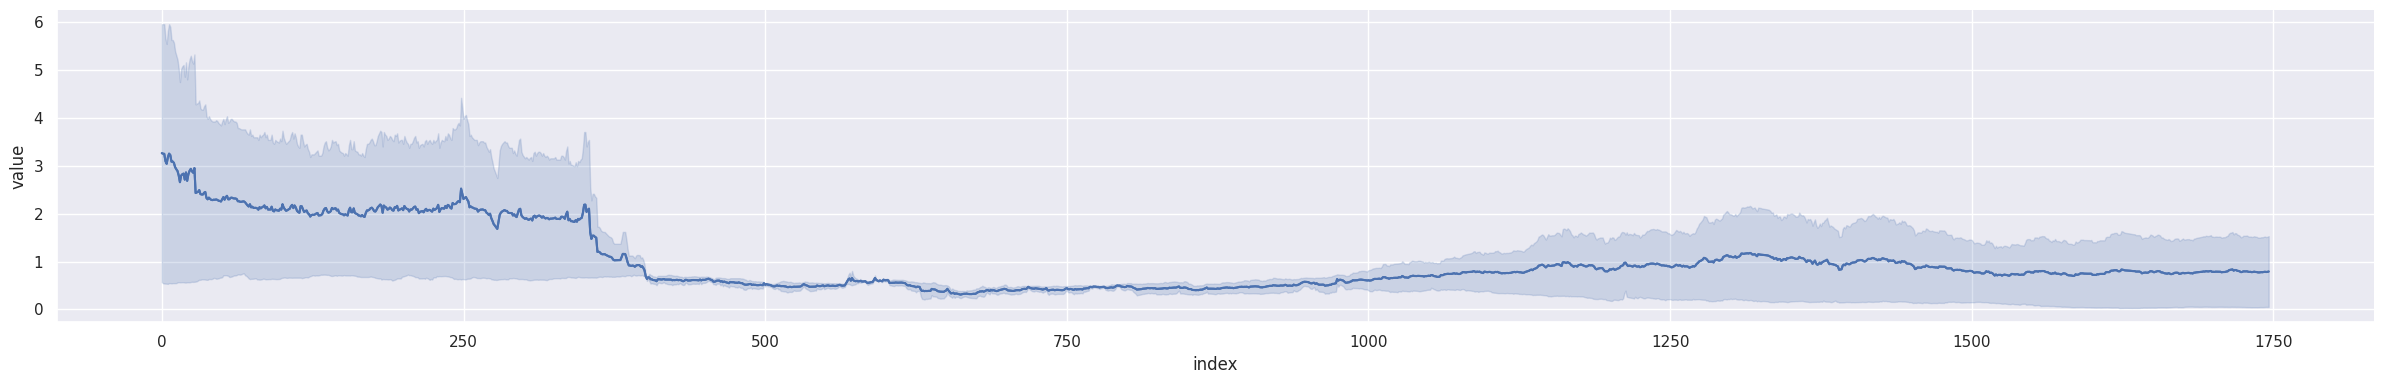

In [ ]:
plot_cluster(*pros(clusters[240]))

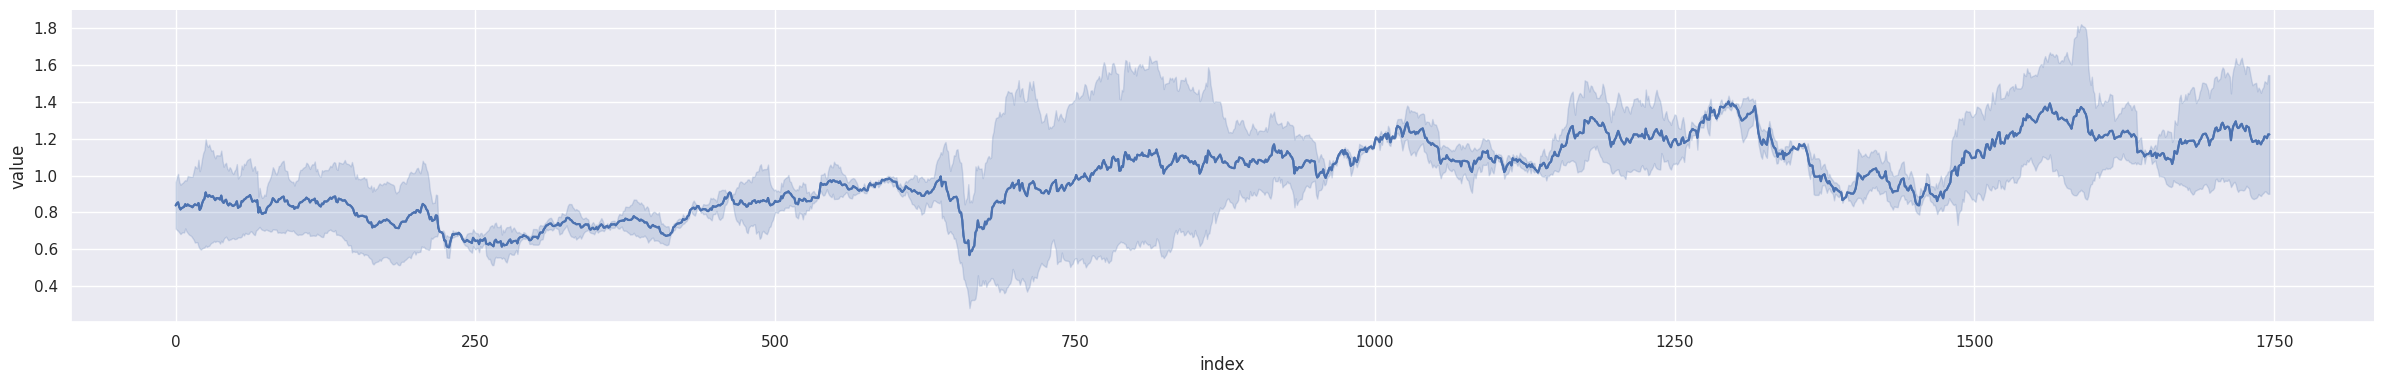

In [ ]:
plot_cluster(*pros(clusters[250]))

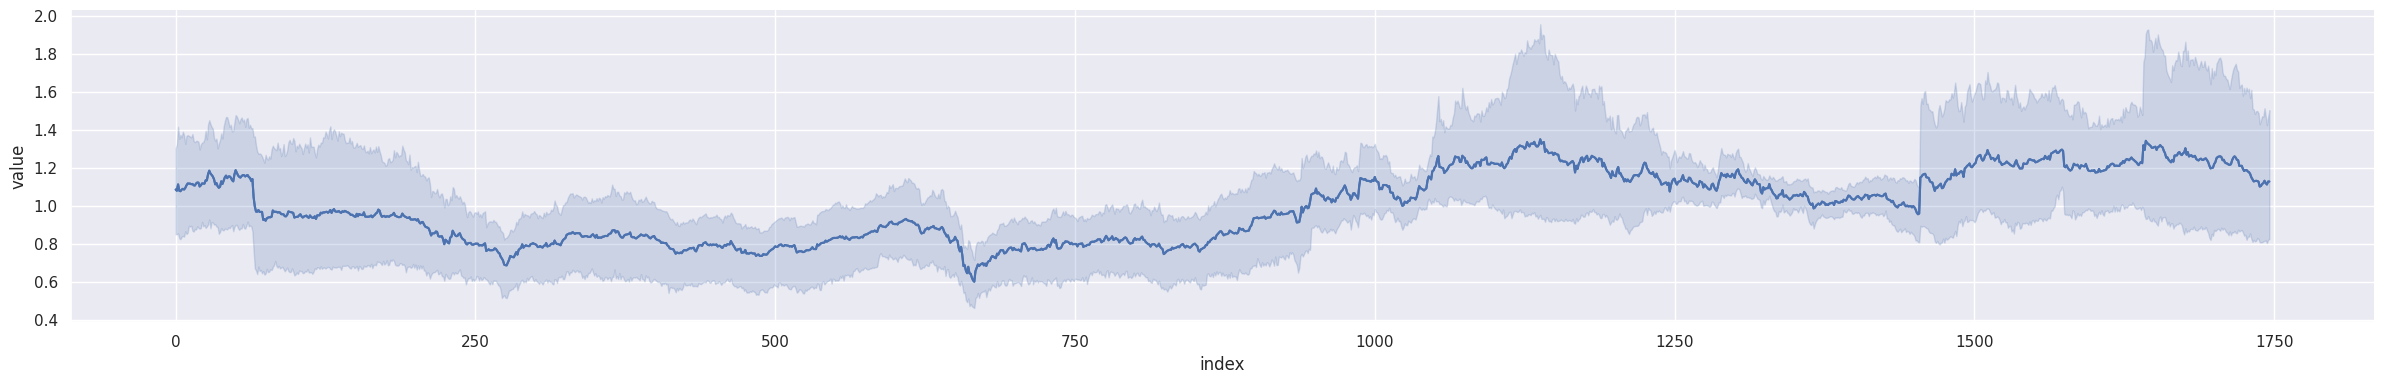

In [ ]:
plot_cluster(*pros(clusters[100]))

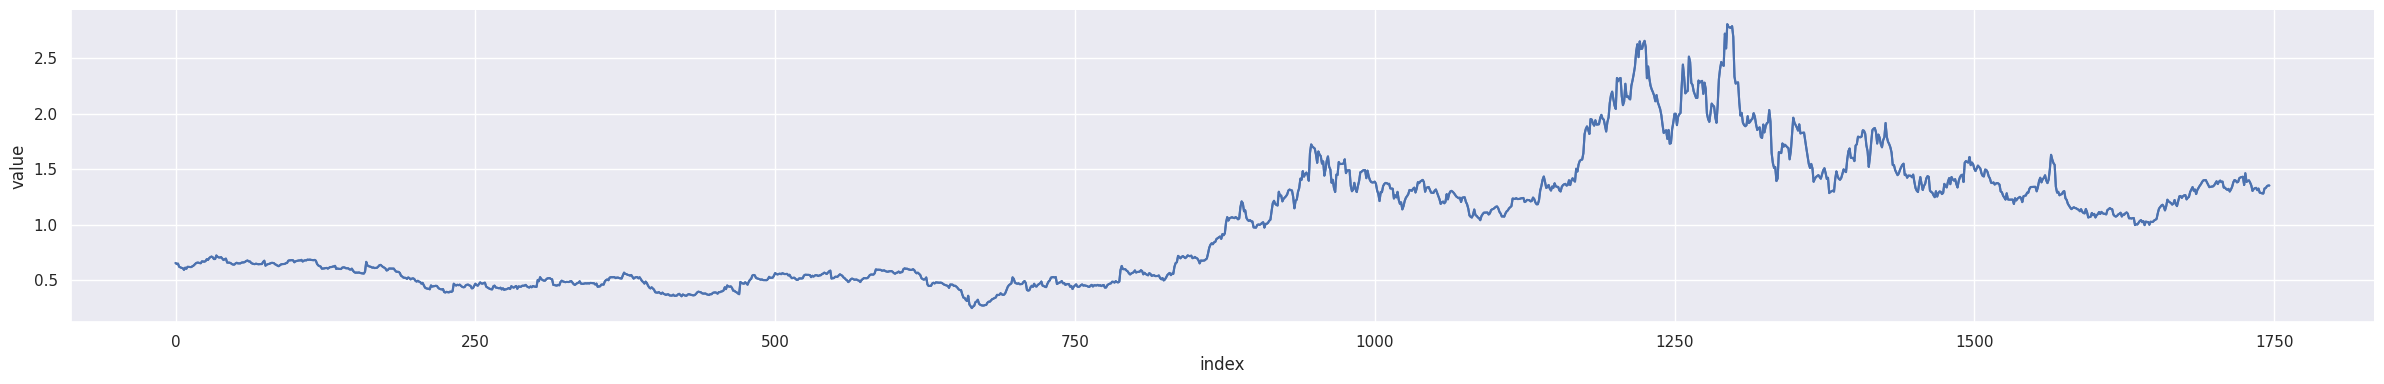

In [ ]:
plot_cluster(*pros(k_clusters[159]))

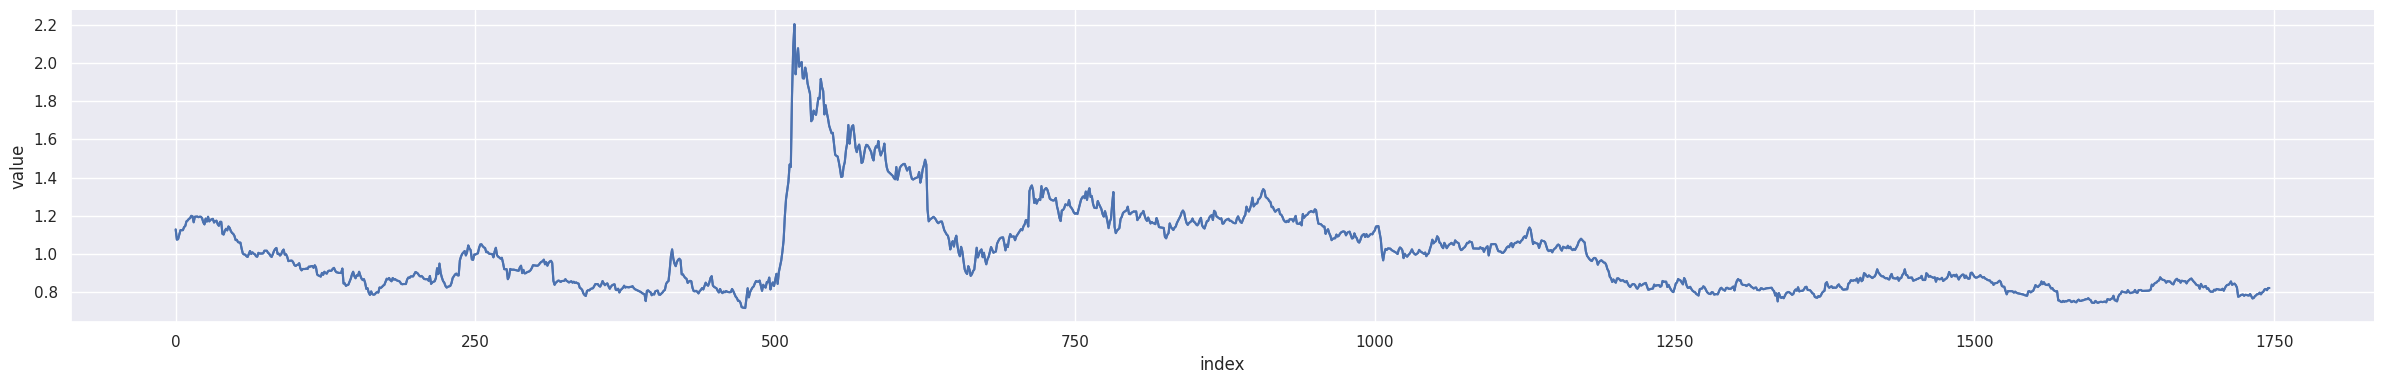

In [ ]:
plot_cluster(*pros(k_clusters[240]))

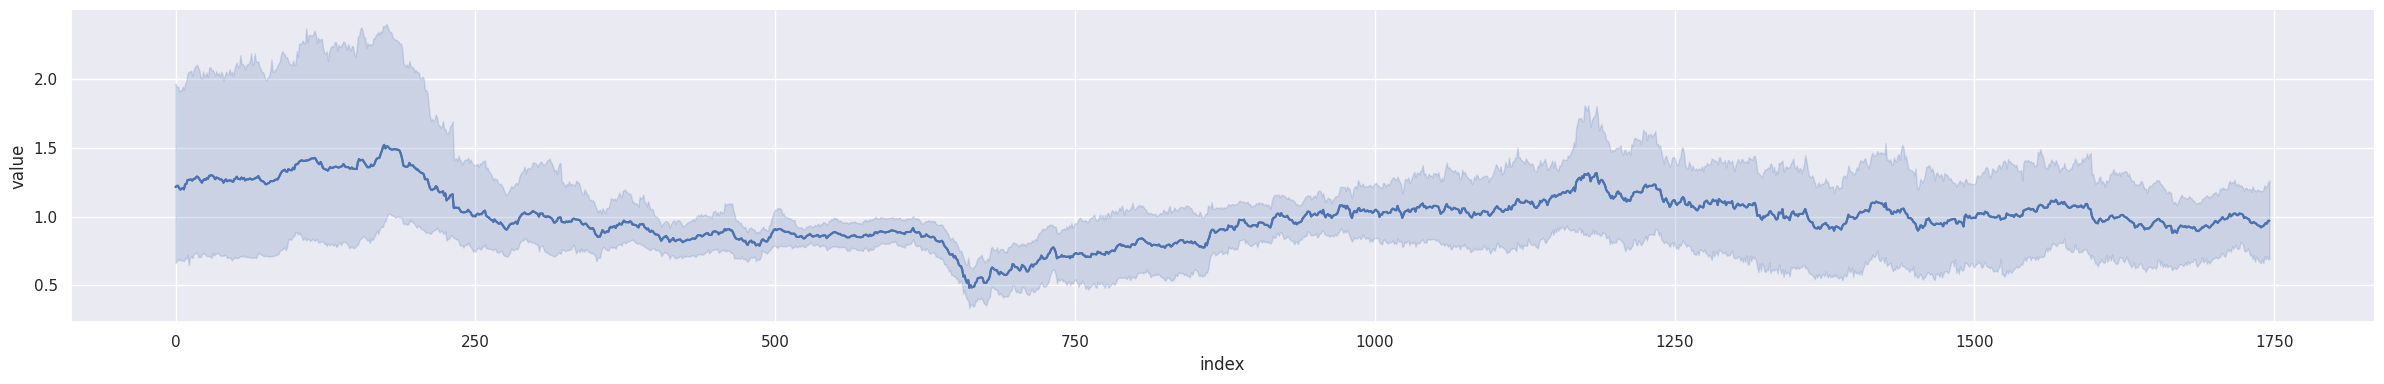

In [ ]:
plot_cluster(*pros(k_clusters[250]))

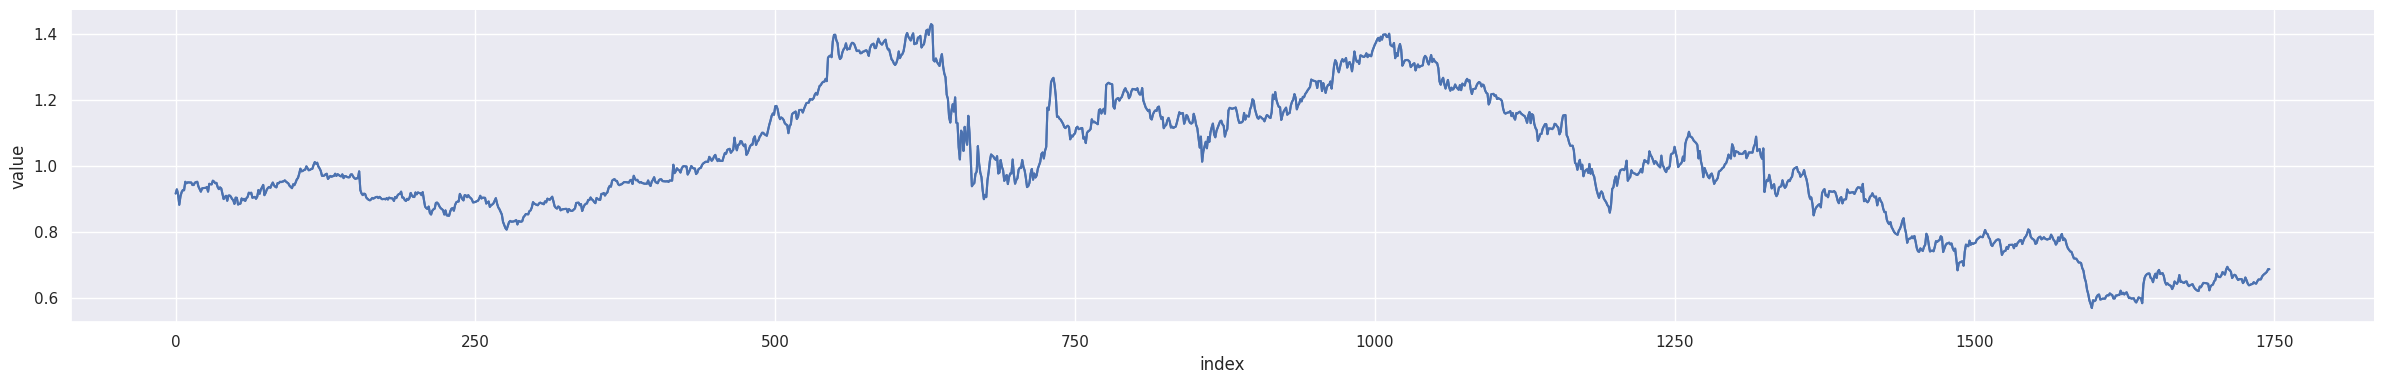

In [ ]:
plot_cluster(*pros(k_clusters[100]))

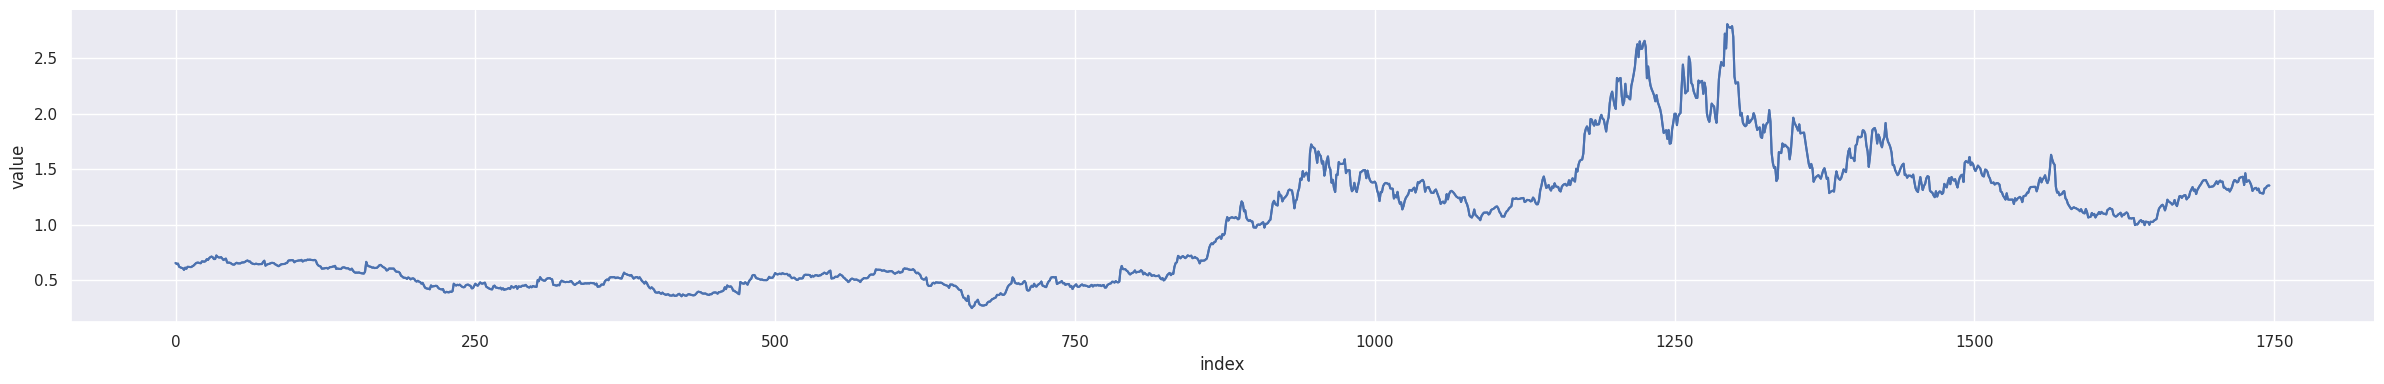

In [ ]:
plot_cluster(*pros(k_clusters[159]))

In [ ]:
def pros(stocks):
    df = pd.DataFrame()
    for stock in stocks:
      sel = time_series[stock]
      sel = sel/np.mean(sel)
      df = pd.concat([df,sel],axis=1)

    new_df = df
    new_df = new_df.fillna(new_df.mean())
    shares = new_df.columns.tolist()
    new_df['index'] = list(range(new_df.shape[0]))
    return new_df,shares
def avrage_cluster(cluster):
    df,shares = pros(cluster)
    # print(df)
    df.index = df['index']
    df = df.drop(['index'],axis=1).mean(axis=1)
    # print(df)
    return df
class Trader:
    from tqdm import tqdm
    def __init__(self, assets):
        self.assets = assets
        self.avr = avrage_cluster([asset.name for asset in self.assets])
    def calculate_profit(self,asset, start_time, end_time):
        buy_price = asset.get_price(start_time)
        sell_price = asset.get_price(end_time)
        profit = (sell_price - buy_price)/sell_price
        return profit
    def claculate_loss(self,start_time, end_time):
        avr_profit = (self.avr[start_time] - self.avr[end_time])/self.avr[start_time]
        loss = 0
        count = 0
        for asset in self.assets:
          prof = self.calculate_profit(asset,start_time, end_time)
          l = (prof - avr_profit)**2
          if np.isnan(l):
            # print(prof,l,avr_profit,asset.name,start_time, end_time)
            continue
          loss += l
          count+=1
        return loss/count
    def claculate_gen_loss(self,step):
        from itertools import permutations
        counter = 0
        loss = 0
        lenght = len(self.avr)
        combs = permutations(range(2,lenght-2), 2)
       # filter the combinations based on the conditions
        threshold = 15
        filtered_combs = [(x, y) for (x, y) in combs if x < y and y - x > threshold and ((y - x)/step).is_integer()]
        for point in (filtered_combs):
          l = (self.claculate_loss(point[0],point[1]))
          if np.isnan(l):
            print(point[0],point[1])
            continue
          loss+= l
            #   print(where,where+interval-1)
            # # print('ghu')
          counter+=1
        return loss/counter

class Asset:
    def __init__(self, prices):
        self.prices = prices
        self.name = prices.name
    def get_price(self, time):
        return self.prices[time]


In [ ]:
a = 11/2
a.is_integer()

False

In [ ]:
filtered_combs[55000]

(31, 730)

In [ ]:
clusters[100]

array([], dtype='<U13')

In [ ]:
clusters[1]

array([], dtype='<U13')

In [ ]:
A = Asset(time_series[clusters[100][0]])

In [ ]:
A.get_price(100)

42.18003845214844

In [ ]:
trader = Trader([Asset(time_series[name]) for name in clusters[100]])

In [ ]:
trader.claculate_loss(100,500)

0.04916096990124403

In [ ]:
trader = Trader([Asset(time_series[name]) for name in rand_clusters[100]])

In [ ]:
trader.claculate_loss(10,100)

0.16408463735907752

In [ ]:
from tqdm import tqdm

In [ ]:
good_traders = [Trader([Asset(time_series[name]) for name in cluster]) for cluster in tqdm(clusters)]

  0%|          | 0/300 [00:00<?, ?it/s]<ipython-input-60-40f73b080b96>:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  new_df['index'] = list(range(new_df.shape[0]))
100%|██████████| 300/300 [00:07<00:00, 40.16it/s]


In [ ]:
k_traders = [Trader([Asset(time_series[name]) for name in cluster]) for cluster in tqdm(k_clusters)]

100%|██████████| 300/300 [00:09<00:00, 31.42it/s]


In [ ]:
clusters[3]

array(['OMER', 'CGAU', 'AQB', ..., 'AKSO.OL', 'RPOWER.NS', 'EDIT'],
      dtype='<U13')

In [ ]:
test = Trader([Asset(time_series[name]) for name in tqdm(clusters[3])])

1553203

In [ ]:
test.claculate_loss(4,104)

In [ ]:
test.claculate_gen_loss(50)

In [ ]:
tot_loss = 0
for trader in tqdm(good_traders):
  tot_loss+=trader.claculate_loss(20,100)
tot_loss/len(good_traders)

100%|██████████| 300/300 [00:00<00:00, 3467.72it/s]


0.11834871762404867

In [ ]:
for ass in good_traders[3].assets:
  if np.isnan(ass.get_price(100)):
    print(ass.name)

In [ ]:
tot_loss = 0
for trader in tqdm(good_traders):
  tot_loss+=trader.claculate_gen_loss(500)
tot_loss/len(good_traders)

100%|██████████| 300/300 [04:05<00:00,  1.22it/s]


12498597.32047733

In [ ]:
tot_loss =0
for trader in tqdm(k_traders):
  tot_loss+=trader.claculate_loss(20,100)
tot_loss/len(k_traders)

100%|██████████| 300/300 [00:00<00:00, 5788.73it/s]


0.11509639344198641

In [ ]:
tot_loss =0
for trader in tqdm(k_traders):
  tot_loss+=trader.claculate_gen_loss(500)
tot_loss/len(k_traders)

100%|██████████| 300/300 [03:52<00:00,  1.29it/s]


5336855.4999604905

In [ ]:
lenght = [len(clus) for clus in clusters]
k_lenght = [len(clus) for clus in k_clusters]

list

In [ ]:
sorted(lenght,reverse=True)

In [ ]:
sorted(k_lenght,reverse=True)